In [1]:
#importing the dataset
from google.colab import files
#downloading the dataset
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d netflix-inc/netflix-prize-data
#downloading the dataset from kaggle

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
kaggle.json
 98% 668M/683M [00:05<00:00, 125MB/s]
100% 683M/683M [00:06<00:00, 118MB/s]


In [2]:
!unzip /content/netflix-prize-data.zip

Archive:  /content/netflix-prize-data.zip
  inflating: README                  
  inflating: combined_data_1.txt     
  inflating: combined_data_2.txt     
  inflating: combined_data_3.txt     
  inflating: combined_data_4.txt     
  inflating: movie_titles.csv        
  inflating: probe.txt               
  inflating: qualifying.txt          


In [4]:
#loading the packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df1 = pd.read_csv('/content/combined_data_1.txt',header=None ,
                  names = ['CusId','Rating'], usecols = [0,1])

In [6]:
df1

,CusId,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [7]:
df1['Rating'].dtype

dtype('float64')

In [8]:
print(f"Total samples are { int(df1.shape[0]/1000000)}M")

Total samples are 24M


In [9]:
print("reloading all the other files as well")
df2 = pd.read_csv('/content/combined_data_2.txt',header=None ,
                  names = ['CusId','Rating'], usecols = [0,1])
df3 = pd.read_csv('/content/combined_data_3.txt',header=None ,
                  names = ['CusId','Rating'], usecols = [0,1])
df4 = pd.read_csv('/content/combined_data_4.txt',header=None ,
                  names = ['CusId','Rating'], usecols = [0,1])

print(f"Total samples in the 2nd file are { int(df2.shape[0]/1000000)}M")
print(f"Total samples in the 3nd file are { int(df3.shape[0]/1000000)}M")
print(f"Total samples in the 4nd file are { int(df4.shape[0]/1000000)}M")

reloading all the other files as well
Total samples in the 2nd file are 26M
Total samples in the 3nd file are 22M
Total samples in the 4nd file are 26M


In [10]:
df = df1
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)

In [11]:
df

,CusId,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
26851921,1790158,4.0
26851922,1608708,3.0
26851923,234275,1.0
26851924,255278,4.0


In [12]:
df.index = np.arange(0,len(df))

In [13]:

df.index = np.arange(0,len(df))
print('Full dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::5000000, :])

Full dataset shape: (100498277, 2)
-Dataset examples-
             CusId  Rating
0               1:     NaN
5000000    2560324     4.0
10000000   2271935     2.0
15000000   1921803     2.0
20000000   1933327     3.0
25000000   1465002     3.0
30000000    961023     4.0
35000000   1372532     5.0
40000000    854274     5.0
45000000    116334     3.0
50000000    768483     3.0
55000000   1331144     5.0
60000000   1609324     2.0
65000000   1699240     3.0
70000000   1776418     4.0
75000000   1643826     5.0
80000000    932047     4.0
85000000   2292868     4.0
90000000    932191     4.0
95000000   1815101     3.0
100000000   872339     4.0


In [14]:
#plotting the data
#p = df.groupby('Rating')['Rating'].agg(['count'])

#getting movie count
movie_count = df.isnull().sum()
movie_count

CusId         0
Rating    17770
dtype: int64

In [15]:
df.groupby('Rating')['Rating'].sum()

Rating
1.0      4617990.0
2.0     20264160.0
3.0     86433741.0
4.0    135003832.0
5.0    115841160.0
Name: Rating, dtype: float64

In [16]:
count_nan =  df.groupby('Rating')['Rating'].agg(['count'])
count_nan

,count
Rating,
1.0,4617990
2.0,10132080
3.0,28811247
4.0,33750958
5.0,23168232


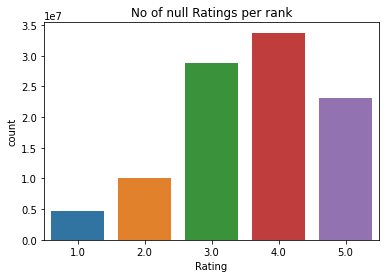

In [17]:
plt.title("No of null Ratings per rank")
sns.barplot(x = count_nan.index , y = count_nan['count'])

In [ ]:
#removing missing values
df.dropna()

In [35]:
movies = pd.read_csv('movie_titles.csv',encoding='ISO-8859-1',names = ['YEAR','MOVIE'])
movies

,YEAR,MOVIE
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch
17769,2003.0,The Company


In [36]:
#finding nan colums
movies.isnull()

,YEAR,MOVIE
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
17766,False,False
17767,False,False
17768,False,False
17769,False,False


In [37]:
movies.isnull().sum()

YEAR     7
MOVIE    0
dtype: int64

### 7 movies doesnot have year values

In [43]:
print("listing no of movies without years")
movies[pd.isnull(movies).any(axis =1 )]

listing no of movies without years


,YEAR,MOVIE
4388,NaN,Ancient Civilizations: Rome and Pompeii
4794,NaN,Ancient Civilizations: Land of the Pharaohs
7241,NaN,Ancient Civilizations: Athens and Greece
10782,NaN,Roti Kapada Aur Makaan
15918,NaN,Hote Hote Pyaar Ho Gaya
16678,NaN,Jimmy Hollywood
17667,NaN,Eros Dance Dhamaka


### adding the missing year of movies manually

In [49]:
movies.at[4388,'YEAR'] = 2001
movies.at[4794,'YEAR'] = 2001
movies.at[7241,'YEAR'] = 2001
movies.at[10782,'YEAR'] = 1974
movies.at[15918,'YEAR'] = 1999
movies.at[16678,'YEAR'] = 1994
movies.at[17667,'YEAR'] = 1999

In [50]:
movies.isnull().sum()

YEAR     0
MOVIE    0
dtype: int64

In [51]:
movies['YEAR'].dtype

dtype('float64')

In [53]:
#converting into Integer
movies['YEAR'].astype(np.int32)

1        2003
2        2004
3        1997
4        1994
5        2004
         ... 
17766    2002
17767    2004
17768    2000
17769    2003
17770    2003
Name: YEAR, Length: 17770, dtype: int32